# Solar flux playbook

<p>
Mal Minhas, v0.1<br>
01.11.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 01.11.24. First version</li>
</ul>
</p>

### 1. Introduction to TSIS-1

The Total and Spectral Solar Irradiance Sensor or [TSIS-1](https://lasp.colorado.edu/tsis/) is an instrument launched by NASA in December 2017 to the International Space Station.  It's purpose is simple and aligns with the Energy Balance Model:
> “You can look at the Earth and Sun connection as a simple energy balance. If you have more energy absorbed by the Earth than leaving it, its temperature increases and vice versa,” said Peter Pilewskie, TSIS-1 lead scientist at the Laboratory for Atmospheric Physics (LASP) in Boulder, Colorado. Under NASA’s direction, LASP is providing and distributing the instrument’s measurements to the scientific community. “We’re measuring all the radiant energy that is coming to Earth.”

TSIS-1 data is updated daily and freely available for download [here](https://lasp.colorado.edu/data/tsis/tsi_data/).  The dataset runs from December 2018 to the current day. THe following function downloaads the latest TSIS data and saves it to a local file called tsis_data.txt:

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Step 1: Download the data
url = "https://lasp.colorado.edu/data/tsis/tsi_data/tsis_tsi_L3_c06h_latest.txt"
response = requests.get(url)
response.raise_for_status()

# Step 2: Save the content to a temporary file
with open("tsis_data.txt", "w") as file:
    file.write(response.text)

### 2. Processing the TSIS-1 dataset

Now we have the data we can read it into a `pandas` data frame `df`.  There are 15 columns of data defined as follows in the file:

```
; ***DATA DEFINITIONS***, number = 15 [field name, type, format, (Col. #, description)]
; nominal_date_yyyymmdd                 R8   f12.3 (Column  1: Nominal Data Time, YYYYMMDD)
; nominal_date_jdn                      R8   f12.3 (Column  2: Nominal Data Time, Julian Day Number)
; avg_measurement_date_jdn              R8   f15.6 (Column  3: Average Data Time, Julian Day Number)
; std_dev_measurement_date              R4    f7.4 (Column  4: Stdev of Average Data Time, days, 1 sigma)
; tsi_1au                               R8   f10.4 (Column  5: Total Solar Irradiance (TSI) at 1-AU, W/m^2)
; instrument_accuracy_1au               R4   e10.3 (Column  6: Instrument Accuracy in 1-AU TSI, W/m^2, 1 sigma)
; instrument_precision_1au              R4   e10.3 (Column  7: Instrument Precision in TSI at 1-AU, W/m^2, 1 sigma)
; solar_standard_deviation_1au          R4   e10.3 (Column  8: Solar Standard Deviation in 1-AU TSI, W/m^2, 1 sigma)
; measurement_uncertainty_1au           R4   e10.3 (Column  9: Total Uncertainty in TSI at 1-AU, W/m^2, 1 sigma)
; tsi_true_earth                        R8   f10.4 (Column 10: Total Solar Irradiance at Earth distance, W/m^2)
; instrument_accuracy_true_earth        R4   e10.3 (Column 11: Instrument Accuracy at Earth distance, W/m^2, 1 sigma)
; instrument_precision_true_earth       R4   e10.3 (Column 12: Instrument Precision at Earth distance, W/m^2, 1 sigma)
; solar_standard_deviation_true_earth   R4   e10.3 (Column 13: Solar Standard Deviation in TSI at Earth, W/m^2, 1 sigma)
; measurement_uncertainty_true_earth    R4   e10.3 (Column 14: Total Uncertainty in TSI at Earth distance, W/m^2, 1 sigma)
; provisional_flag                      I2      i2 (Column 15: Provisional Flag, 1=provisional data, 0=final data)
; ***END DATA DEFINITIONS***
```

Let's use those definitions to set our column titles for `df`:

In [2]:
# Step 3: Load the data into a DataFrame, skipping header lines starting with ';'
df = pd.read_csv(
    "tsis_data.txt",
    #delim_whitespace=True,
    sep='\s+',
    comment=';',  # Ignore comment lines starting with ';'
    header=None  # No headers in the data itself
)

# Step 4: Assign column names based on your specified format
# We'll name only relevant columns for simplicity
df.columns = [
    'Date', 'JulianDay', 'AdjustedJulianDay', 'AverageDate', 
    'TSI', 'Accuracy', 'Precision', 'SolarStd', 'Uncertainty', 
    'TSITE', 'AccuracyTE', 'PrecisionTE', 'SolarStdTE', 
    'UncertaintyTE', 'Provisional'
]

# Step 5: Parse the 'Date' column to a datetime format
# The format provided is YYYYMMDD.FFF (with fractional day as the decimal part)
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d'))

Let's have a look at `df`:

In [3]:
df.head(10)

,Date,JulianDay,AdjustedJulianDay,AverageDate,TSI,Accuracy,Precision,SolarStd,Uncertainty,TSITE,AccuracyTE,PrecisionTE,SolarStdTE,UncertaintyTE,Provisional
0,2018-01-11,2458129.625,2.458130e+06,0.0064,1361.6518,0.1898,0.0068,0.04423,0.1949,1407.7950,0.1962,0.0068,0.04577,0.2015,0
1,2018-01-11,2458129.875,2.458130e+06,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0
2,2018-01-11,2458130.125,2.458130e+06,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0
3,2018-01-11,2458130.375,2.458130e+06,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0
4,2018-01-12,2458130.625,2.458131e+06,0.0939,1361.6644,0.1898,0.0068,0.07366,0.2036,1407.6859,0.1962,0.0068,0.07977,0.2118,0
5,2018-01-12,2458130.875,2.458131e+06,0.0021,1361.6220,0.1898,0.0068,0.02775,0.1918,1407.6247,0.1962,0.0068,0.02893,0.1983,0
6,2018-01-12,2458131.125,2.458131e+06,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0
7,2018-01-12,2458131.375,2.458131e+06,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0
8,2018-01-13,2458131.625,2.458132e+06,0.0975,1361.6219,0.1898,0.0068,0.08030,0.2061,1407.4989,0.1962,0.0068,0.08234,0.2128,0
9,2018-01-13,2458131.875,2.458132e+06,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0


### 3. Plotting total flux

Before we plot the TSI values in column 5, we want to filter out the zero value data points:

In [4]:
# Step 6: Filter out rows where Total_Solar_Flux is zero
df_filtered = df[df['TSI'] != 0]
df_filtered.head(10)

,Date,JulianDay,AdjustedJulianDay,AverageDate,TSI,Accuracy,Precision,SolarStd,Uncertainty,TSITE,AccuracyTE,PrecisionTE,SolarStdTE,UncertaintyTE,Provisional
0,2018-01-11,2458129.625,2.458130e+06,0.0064,1361.6518,0.1898,0.0068,0.04423,0.1949,1407.7950,0.1962,0.0068,0.04577,0.2015,0
4,2018-01-12,2458130.625,2.458131e+06,0.0939,1361.6644,0.1898,0.0068,0.07366,0.2036,1407.6859,0.1962,0.0068,0.07977,0.2118,0
5,2018-01-12,2458130.875,2.458131e+06,0.0021,1361.6220,0.1898,0.0068,0.02775,0.1918,1407.6247,0.1962,0.0068,0.02893,0.1983,0
8,2018-01-13,2458131.625,2.458132e+06,0.0975,1361.6219,0.1898,0.0068,0.08030,0.2061,1407.4989,0.1962,0.0068,0.08234,0.2128,0
36,2018-01-20,2458138.625,2.458139e+06,0.0056,1361.6873,0.1898,0.0068,0.14880,0.2412,1406.2420,0.1960,0.0068,0.15390,0.2492,0
37,2018-01-20,2458138.875,2.458139e+06,0.0054,1361.6109,0.1898,0.0068,0.09455,0.2121,1406.1190,0.1960,0.0068,0.09755,0.2189,0
44,2018-01-22,2458140.625,2.458141e+06,0.0330,1361.5640,0.1898,0.0068,0.08827,0.2093,1405.6158,0.1959,0.0068,0.09267,0.2168,0
45,2018-01-22,2458140.875,2.458141e+06,0.0723,1361.5899,0.1898,0.0068,0.17580,0.2587,1405.5938,0.1959,0.0068,0.18380,0.2687,0
46,2018-01-22,2458141.125,2.458141e+06,0.0317,1361.6000,0.1898,0.0068,0.11840,0.2237,1405.5564,0.1959,0.0068,0.12720,0.2336,0
47,2018-01-22,2458141.375,2.458141e+06,0.0532,1361.5876,0.1898,0.0068,0.15160,0.2429,1405.4681,0.1959,0.0068,0.15600,0.2504,0


We can now do a plot of `df_filtered` adding a grid and month by month detail.  To do that, we need to first set the index of `df_filtered` to our date:

In [5]:
# Step 7: Set 'Date' as the index for easy plotting
df_filtered.set_index('Date', inplace=True)

Now we can set up our label accordingly:

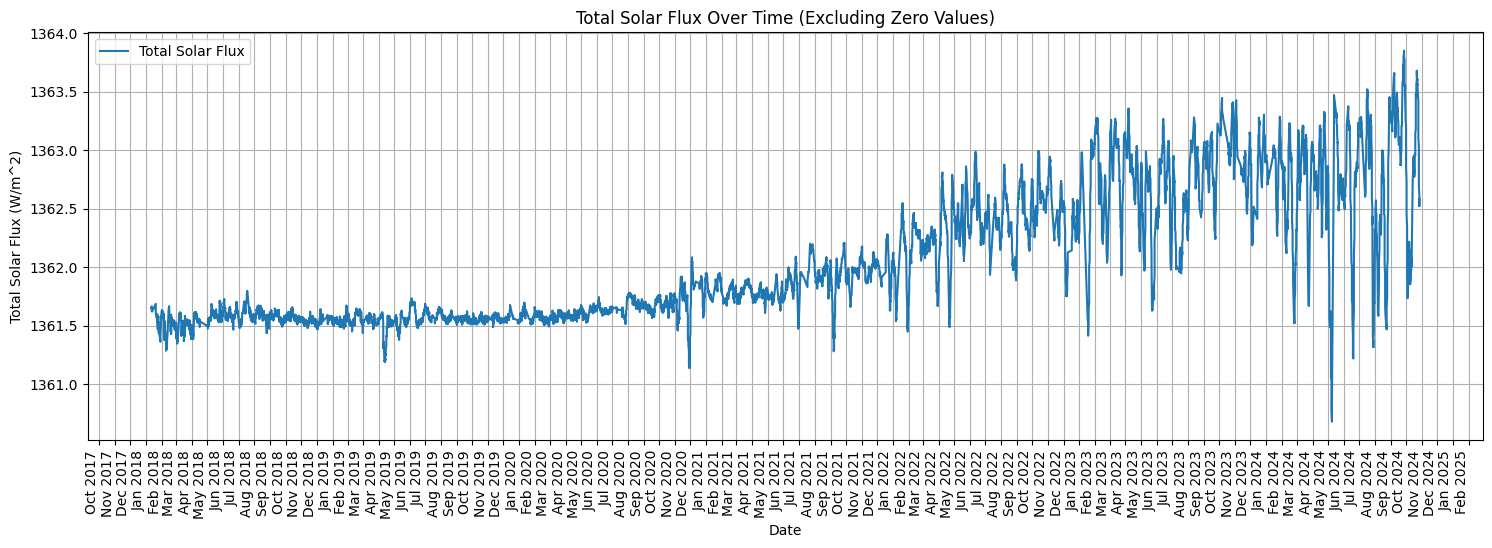

In [6]:
# Step 8: Plot Total Solar Flux over time with month markers and yearly labels using data.plot()
ax = df_filtered['TSI'].plot(
    figsize=(18, 6), 
    legend=True, 
    title='Total Solar Flux Over Time (Excluding Zero Values)',
    label='Total Solar Flux'  # Set custom legend label
)

ax.set_xlabel("Date")
ax.set_ylabel("Total Solar Flux (W/m^2)")
ax.grid(True)
# Set month markers with only year labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Rotate date labels for clarity
plt.gcf().autofmt_xdate(rotation=90)

Measured solar flux has been increasing over this period as we are exiting a the quiet part of the current cycle and heading towards our next peak in 2025:
> the Sun’s output energy is not constant. Over the course of about 11 years, our Sun cycles from a relatively quiet state to a peak in intense solar activity — like explosions of light and solar material — called a solar maximum. In subsequent years the Sun returns to a quiet state and the cycle starts over again. The Sun has fewer sunspots — dark areas that are often the source of increased solar activity — and stops producing so many explosions, going through a period called the solar minimum. Over the course of one solar cycle (one 11-year period), the Sun’s emitted energy varies on average at about 0.1 percent. That may not sound like a lot, but the Sun emits a large amount of energy – 1,361 watts per square meter. Even fluctuations at just a tenth of a percent can affect Earth.

![](tsis_totalsolarirradiance_graph_02340_print.webp)